In [1]:
import pandas as pd
import numpy as np
import scipy.stats as scipy
import matplotlib.pyplot as plt
import requests #download from football data
import io 
from __future__ import division
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r"C:\Users\HP\Game prediction\DatasetTEST123.csv", encoding= 'unicode_escape')

In [3]:
df = pd.read_csv("DatasetTEST123.csv",encoding= 'unicode_escape')

In [4]:
df.columns

Index(['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG',
       'HTAG', 'HTR', 'Referee', 'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW', 'HC',
       'AC', 'HF', 'AF', 'HO', 'AO', 'HY', 'AY', 'HR', 'AR', 'HBP', 'ABP',
       'GBH', 'GBD', 'GBA', 'IWH', 'IWD', 'IWA', 'LBH', 'LBD', 'LBA', 'SBH',
       'SBD', 'SBA', 'WHH', 'WHD', 'WHA', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65',
       'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69',
       'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73'],
      dtype='object')

In [5]:
df

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73
0,E0,19/08/00,Charlton,Man City,4,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,E0,19/08/00,Chelsea,West Ham,4,2,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,E0,19/08/00,Coventry,Middlesbrough,1,3,A,1,1,D,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,E0,19/08/00,Derby,Southampton,2,2,D,1,2,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,E0,19/08/00,Leeds,Everton,2,0,H,2,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7215,E0,12/5/2019,Liverpool,Wolves,2,0,H,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7216,E0,12/5/2019,Man United,Cardiff,0,2,A,0,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7217,E0,12/5/2019,Southampton,Huddersfield,1,1,D,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7218,E0,12/5/2019,Tottenham,Everton,2,2,D,1,0,H,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
res_16 = df.iloc[:,:23]
res_16 = res_16.drop(['Div','Date'],axis=1)
# res_14 = df_14.ix[:,:23]
# res_14 = res_14.drop(['Div','Date'],axis=1)
table_features = df.iloc[:,:7]
table_features = table_features.drop(['FTHG','FTAG','Div','Date'],axis=1)
bet_16 = df.iloc[:,23:]

In [7]:
res_16.head()
feature_table = df.iloc[:,:23]

In [8]:
res_16.tail()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,Referee,HS,...,HST,AST,HHW,AHW,HC,AC,HF,AF,HO,AO
7215,Liverpool,Wolves,2,0,H,1,0,H,M Atkinson,13,...,5,2,3,11,4,1,0,2,0,0
7216,Man United,Cardiff,0,2,A,0,1,A,J Moss,26,...,10,4,9,6,11,2,3,3,0,0
7217,Southampton,Huddersfield,1,1,D,1,0,H,L Probert,10,...,3,3,8,6,4,3,0,1,0,0
7218,Tottenham,Everton,2,2,D,1,0,H,A Marriner,11,...,3,9,10,13,7,4,0,2,0,0
7219,Watford,West Ham,1,4,A,0,2,A,C Kavanagh,17,...,8,9,10,10,7,2,1,0,1,0


In [9]:
#Team, Home Goals Score, Away Goals Score, Attack Strength, Home Goals Conceded, Away Goals Conceded, Defensive Strength
table_16 = pd.DataFrame(columns=('Team','HGS','AGS','HAS','AAS','HGC','AGC','HDS','ADS',))
table_16 = table_16[:-10]

In [10]:
res_16 = res_16[:-10]
res_16.shape[0]

7210

In [11]:
avg_home_scored_16 = res_16.FTHG.sum()*1.0 / res_16.shape[0]
avg_away_scored_16 = res_16.FTAG.sum()*1.0 / res_16.shape[0]
avg_home_conceded_16 = avg_away_scored_16
avg_away_conceded_16 = avg_home_scored_16
print("Average number of goals at home",avg_home_scored_16)
print("Average number of goals away", avg_away_scored_16)
print("Average number of goals conceded at home",avg_home_conceded_16)
print("Average number of goals conceded away",avg_away_conceded_16)

Average number of goals at home 1.5299583911234396
Average number of goals away 1.1350901525658808
Average number of goals conceded at home 1.1350901525658808
Average number of goals conceded away 1.5299583911234396


In [12]:
res_home = res_16.groupby('HomeTeam')
res_away = res_16.groupby('AwayTeam')

In [13]:
table_16.Team = res_home.HomeTeam.all().index
table_16.HGS = res_home.FTHG.sum().values
table_16.HGC = res_home.FTAG.sum().values
table_16.AGS = res_away.FTAG.sum().values
table_16.AGC = res_away.FTHG.sum().values

In [14]:
#Assuming number of home games = number of away games
num_games = res_16.shape[0]/20

In [15]:
table_16.HAS = (table_16.HGS / num_games) / avg_home_scored_16
table_16.AAS = (table_16.AGS / num_games) / avg_away_scored_16
table_16.HDS = (table_16.HGC / num_games) / avg_home_conceded_16
table_16.ADS = (table_16.AGC / num_games) / avg_away_conceded_16
table_16

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
0,Arsenal,797,589,1.445019,1.439394,305,435,0.745357,0.788686
1,Aston Villa,377,341,0.683528,0.833333,341,501,0.833333,0.908349
2,Birmingham,162,111,0.293718,0.271261,140,220,0.342131,0.398876
3,Blackburn,289,229,0.523978,0.559629,239,353,0.584066,0.640015
4,Blackpool,30,25,0.054392,0.061095,37,41,0.090420,0.074336
5,Bolton,278,217,0.504034,0.530303,260,353,0.635386,0.640015
6,Bournemouth,114,84,0.206690,0.205279,118,142,0.288368,0.257456
7,Bradford,20,10,0.036261,0.024438,29,41,0.070870,0.074336
8,Brighton,42,26,0.076149,0.063539,49,61,0.119746,0.110597
9,Burnley,104,85,0.188560,0.207722,117,177,0.285924,0.320914


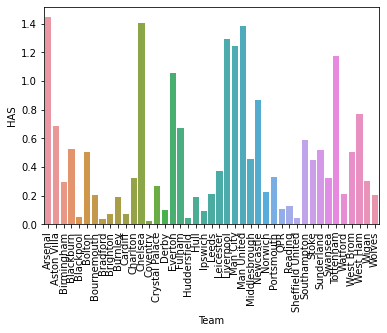

In [16]:
has_plot = sns.barplot(table_16.Team,table_16.HAS)
for item in has_plot.get_xticklabels():
    item.set_rotation(90)

In [17]:
table_16[table_16.Team == "Liverpool"]

,Team,HGS,AGS,HAS,AAS,HGC,AGC,HDS,ADS
23,Liverpool,714,553,1.294534,1.351417,274,433,0.669599,0.78506


In [18]:
''' feature_table contains all the fixtures in the current season.
ftr = full time result
hst = home shots on target
ast = away shots on target
'''

feature_table = feature_table[['HomeTeam','AwayTeam','FTR','HST','AST']]
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feature_table.iterrows():
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['AwayTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['AwayTeam']]['ADS'].values[0])
    
feature_table['HAS'] = f_HAS
feature_table['HDS'] = f_HDS
feature_table['AAS'] = f_AAS
feature_table['ADS'] = f_ADS

In [20]:
feature_table.head(20)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS
0,Charlton,Man City,H,14,4,0.324540,0.434995,1.229228,0.785060
1,Chelsea,West Ham,H,10,5,1.403318,0.689150,0.752688,0.921041
2,Coventry,Middlesbrough,A,3,9,0.025383,0.056207,0.398338,0.491343
3,Derby,Southampton,D,4,6,0.099719,0.227273,0.562072,0.620071
4,Leeds,Everton,H,8,6,0.212129,0.241935,0.940860,0.910162
5,Leicester,Aston Villa,D,4,3,0.371680,0.469208,0.833333,0.908349
6,Liverpool,Bradford,H,10,2,1.294534,0.669599,0.024438,0.074336
7,Sunderland,Arsenal,H,2,7,0.522165,0.821114,1.439394,0.788686
8,Tottenham,Ipswich,H,6,5,1.173058,0.896872,0.114858,0.121476
9,Man United,Newcastle,H,9,6,1.385187,0.632942,0.808895,0.971807


In [21]:
def transformResult(row):
    '''Converts results (H,A or D) into numeric values'''
    if(row.FTR == 'H'):
        return 1
    elif(row.FTR == 'A'):
        return -1
    else:
        return 0

In [22]:
feature_table["Result"] = feature_table.apply(lambda row: transformResult(row),axis=1)

In [23]:
feature_table = feature_table[:-10] #ONLY FOR WEEK 33. REMOVE FROM 34
feature_table.tail(10)

,HomeTeam,AwayTeam,FTR,HST,AST,HAS,HDS,AAS,ADS,Result
7200,Everton,Burnley,H,6,1,1.053395,0.940860,0.207722,0.320914,1
7201,Bournemouth,Tottenham,H,6,5,0.206690,0.288368,1.163245,0.924667,1
7202,Cardiff,Crystal Palace,A,8,7,0.074336,0.178397,0.378788,0.391624,-1
7203,Newcastle,Liverpool,A,7,4,0.870275,0.933529,1.351417,0.785060,-1
7204,West Ham,Southampton,H,6,1,0.770556,0.955523,0.562072,0.620071,1
7205,Wolves,Fulham,H,6,2,0.204877,0.369013,0.569404,0.803191,1
7206,Arsenal,Brighton,D,8,5,1.445019,0.745357,0.063539,0.110597,0
7207,Chelsea,Watford,H,9,3,1.403318,0.689150,0.215054,0.304596,1
7208,Huddersfield,Man United,D,3,7,0.047140,0.136852,1.471163,0.696220,0
7209,Man City,Leicester,H,5,2,1.245581,0.779570,0.442326,0.453268,1


In [24]:
X_train = feature_table[['HST','AST','HAS','HDS','AAS','ADS',]]
y_train = feature_table['Result']

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
# from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import voting_classifier
from sklearn.svm import LinearSVC

In [26]:
clf1 = RandomForestClassifier()
clf2 = MultinomialNB()
# clf3 = XGBClassifier()
clf4 = LinearSVC()

In [27]:
y_pred = clf1.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf1, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.48266297 0.48127601 0.48821082 0.48404993 0.52704577 0.49375867
 0.51733703 0.53952843 0.52149792 0.54368932]
0.5079056865464632


In [28]:
y_pred = clf2.fit(X_train,y_train).predict(X_train)
accuracy_score(y_pred,y_train)
scores = cross_val_score(clf2, X_train, y_train, cv=10)
print(scores)
print(scores.mean())

[0.56865465 0.51456311 0.53675451 0.54923717 0.52288488 0.52288488
 0.55617198 0.57697642 0.59500693 0.59084605]
0.5533980582524272


In [29]:
#What is this for?
ht = res_16.loc[40].HomeTeam
at = res_16.loc[40].AwayTeam

In [30]:
feat_table = res_16.sort_index(ascending=False)
feat_table = feat_table[['HomeTeam','AwayTeam','FTR','FTHG','FTAG','HS','AS','HC','AC']]

In [31]:
# Adding next week fixtures
new_fixtures = pd.DataFrame( [['Everton','West Brom','D',0,0,0,0,0,0],
                             ['Man United','Crystal Palace','D',0,0,0,0,0,0],
                             ['Southampton','Tottenham','D',0,0,0,0,0,0],
                             ['Chelsea','Liverpool','D',0,0,0,0,0,0],
                             ['Stoke','West Brom','D',0,0,0,0,0,0],
                             ['Southampton','Huddersfield','D',0,0,0,0,0,0],
                             ['Man City','Bournemouth','D',0,0,0,0,0,0],
                             ['Brighton','Watford','D',0,0,0,0,0,0],
                             ['Everton','Chelsea','D',0,0,0,0,0,0],
                             ['Arsenal','Liverpool','D',0,0,0,0,0,0]],columns=feat_table.columns)

In [32]:
new_feat_table = new_fixtures.append(feat_table,ignore_index=True)
new_feat_table = new_feat_table.sort_index(ascending=False)
new_feat_table = new_feat_table.reset_index().drop(['index'], axis=1)
new_feat_table = new_feat_table.sort_index(ascending=False)
# feat_table = n
feat_table = new_feat_table
feat_table.shape

(7220, 9)

In [33]:
#Adding k recent performance measures
feat_table["pastHS"] = 0.0
feat_table["pastHC"] = 0.0
feat_table["pastAS"] = 0.0
feat_table["pastAC"] = 0.0
feat_table["pastHG"] = 0.0
feat_table["pastAG"] = 0.0

In [34]:
feat_table.head(12)

,HomeTeam,AwayTeam,FTR,FTHG,FTAG,HS,AS,HC,AC,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG
7219,Everton,West Brom,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7218,Man United,Crystal Palace,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7217,Southampton,Tottenham,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7216,Chelsea,Liverpool,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7215,Stoke,West Brom,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7214,Southampton,Huddersfield,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7213,Man City,Bournemouth,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7212,Brighton,Watford,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7211,Everton,Chelsea,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
7210,Arsenal,Liverpool,D,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
f_HAS = []
f_HDS = []
f_AAS = []
f_ADS = []
for index,row in feat_table.iterrows():
    #print row
    f_HAS.append(table_16[table_16['Team'] == row['HomeTeam']]['HAS'].values[0])
    f_HDS.append(table_16[table_16['Team'] == row['HomeTeam']]['HDS'].values[0])
    f_AAS.append(table_16[table_16['Team'] == row['HomeTeam']]['AAS'].values[0])
    f_ADS.append(table_16[table_16['Team'] == row['HomeTeam']]['ADS'].values[0])
    
feat_table['HAS'] = f_HAS
feat_table['HDS'] = f_HDS
feat_table['AAS'] = f_AAS
feat_table['ADS'] = f_ADS

In [36]:
test_table = feat_table.drop(['FTHG','FTAG','HS','AS','HC','AC'],axis=1)

In [37]:
test_table["Result"] = test_table.apply(lambda row: transformResult(row),axis=1)
test_table.sort_index(inplace=True)

In [39]:
# num_games decides the train-test split
print(feat_table.shape)
num_games = feat_table.shape[0]-10
num_games

(7220, 19)


7210

In [40]:
X_train = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[0:num_games]
y_train = test_table['Result'].loc[0:num_games]
X_test = test_table[['pastHS','pastHC','pastAS','pastAC','pastHG','pastAG','HAS','HDS','AAS','ADS']].loc[num_games:]
y_test = test_table['Result'].loc[num_games:]

In [41]:
test_table["pastCornerDiff"] = (test_table["pastHC"] - test_table["pastAC"])
test_table["pastGoalDiff"] = (test_table["pastHG"] - test_table["pastAG"])
test_table["pastShotsDiff"] = (test_table["pastHS"] - test_table["pastAG"])

In [42]:
''' number of games to exclude in the training set for validation
For example, if 240 games have been played, test_table has 250 fixtures - the last 10 being the ones that haven't
been played. So, we set aside 20 fixtures from the training set containing 240 fixtures for validation.''' 
num_games = feat_table.shape[0]-10
print(num_games)
v_split = 15
n_games = num_games - v_split

7210


In [43]:
test_table = test_table.fillna(0)

In [44]:
test_table.head()

,HomeTeam,AwayTeam,FTR,pastHS,pastHC,pastAS,pastAC,pastHG,pastAG,HAS,HDS,AAS,ADS,Result,pastCornerDiff,pastGoalDiff,pastShotsDiff
0,Charlton,Man City,H,0.0,0.0,0.0,0.0,0.0,0.0,0.324540,0.434995,0.298143,0.377119,1,0.0,0.0,0.0
1,Chelsea,West Ham,H,0.0,0.0,0.0,0.0,0.0,0.0,1.403318,0.689150,1.370968,0.638201,1,0.0,0.0,0.0
2,Coventry,Middlesbrough,A,0.0,0.0,0.0,0.0,0.0,0.0,0.025383,0.056207,0.053763,0.072523,-1,0.0,0.0,0.0
3,Derby,Southampton,D,0.0,0.0,0.0,0.0,0.0,0.0,0.099719,0.227273,0.085533,0.213943,0,0.0,0.0,0.0
4,Leeds,Everton,H,0.0,0.0,0.0,0.0,0.0,0.0,0.212129,0.241935,0.239492,0.212129,1,0.0,0.0,0.0


In [45]:
test_table.drop(['pastHC','pastAS','pastAC','pastHG','pastAG'],axis=1)
X_train = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[0:n_games]
y_train = test_table['Result'].loc[0:n_games]
X_test = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[n_games:num_games-1]
y_test = test_table['Result'].loc[n_games:num_games-1]
X_predict = test_table[['pastCornerDiff','pastGoalDiff','pastShotsDiff','HAS','HDS','AAS','ADS']].loc[num_games:]

In [46]:
X_predict

,pastCornerDiff,pastGoalDiff,pastShotsDiff,HAS,HDS,AAS,ADS
7210,0.0,0.0,0.0,1.445019,0.745357,1.439394,0.788686
7211,0.0,0.0,0.0,1.053395,0.940860,0.940860,0.910162
7212,0.0,0.0,0.0,0.076149,0.119746,0.063539,0.110597
7213,0.0,0.0,0.0,1.245581,0.779570,1.229228,0.785060
7214,0.0,0.0,0.0,0.591062,0.647605,0.562072,0.620071
7215,0.0,0.0,0.0,0.449642,0.520528,0.366569,0.565679
7216,0.0,0.0,0.0,1.403318,0.689150,1.370968,0.638201
7217,0.0,0.0,0.0,0.591062,0.647605,0.562072,0.620071
7218,0.0,0.0,0.0,1.385187,0.632942,1.471163,0.696220
7219,0.0,0.0,0.0,1.053395,0.940860,0.940860,0.910162


In [47]:
plot_scores_knn = []
for b in range(1,50):
    clf_knn = KNeighborsClassifier(n_neighbors=b)
    clf_knn.fit(X_train,y_train)
    scores = accuracy_score(y_test,clf_knn.predict(X_test))
    plot_scores_knn.append(scores)

# #XGBClassifier
# plot_scores_XGB = []
# for i in range(1,100):
#     clf_XGB = XGBClassifier(n_estimators=i,max_depth=100)
#     clf_XGB.fit(X_train, y_train)
#     scores = accuracy_score(y_test,clf_XGB.predict(X_test))
#     plot_scores_XGB.append(scores)
    
#Logistic Regression
plot_scores_logreg= []
cs = [0.01,0.02,0.1,0.5,1,3,4,5,10]
for c in cs:
    clf_logreg = LogisticRegression(C=c,solver='lbfgs',multi_class='ovr')
    clf_logreg.fit(X_train, y_train)
    scores = accuracy_score(y_test,clf_logreg.predict(X_test))
    plot_scores_logreg.append(scores)

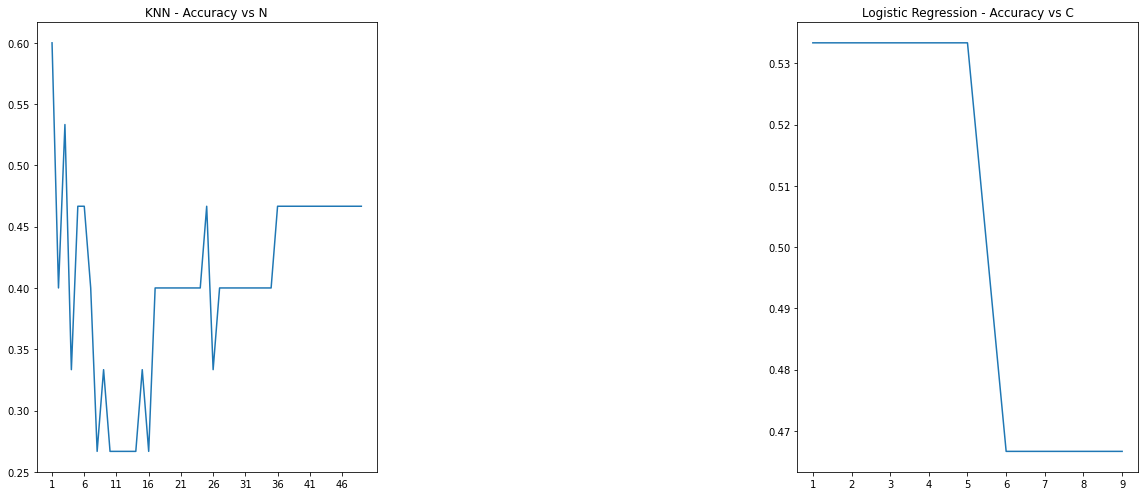

In [48]:
fig = plt.figure(figsize = (16,7))
# plt.style.use('ggplot')

ax1 = fig.add_subplot(1,3,1)
ax1.plot(range(1,50),plot_scores_knn);
ax1.set_title("KNN - Accuracy vs N")
ax1.set_xticks(range(1,50,5));

# ax2 = fig.add_subplot(1,3,2)
# ax2.plot(range(1,100),plot_scores_XGB);
# ax2.set_xticks(range(1,100,6));
# ax2.set_title("XGB - Accuracy vs n_estimators")

ax3 = fig.add_subplot(1,3,3)
ax3.plot(range(1,10),plot_scores_logreg);
ax3.set_xticks(range(1,10));
ax3.set_title("Logistic Regression - Accuracy vs C")

fig.tight_layout()

In [49]:
max_knn_n = max(plot_scores_knn)
max_knn_ind = plot_scores_knn.index(max_knn_n)

# max_XGB_e = max(plot_scores_XGB)
# max_XGB_ind = plot_scores_XGB.index(max_XGB_e) if plot_scores_XGB.index(max_XGB_e)!=0 else 1

max_logreg_c = max(plot_scores_logreg)
max_logreg_ind = plot_scores_logreg.index(max_logreg_c)

print(max_knn_n, max_knn_ind)
# print(max_XGB_e, max_XGB_ind)
print(max_logreg_c, max_logreg_ind)

#max_knn_ind=15 
#max_XGB_ind=40
#max_logreg_ind=3

0.6 0
0.5333333333333333 0


In [50]:
clf_knn = KNeighborsClassifier(n_neighbors=max_knn_ind).fit(X_train,y_train)
# clf_XGB = XGBClassifier(n_estimators=max_XGB_ind).fit(X_train,y_train)
clf_logreg = LogisticRegression(C=max_logreg_ind,solver='lbfgs',multi_class='ovr').fit(X_train,y_train)

ValueError: Expected n_neighbors > 0. Got 0

In [51]:
y_pred_knn = clf_knn.predict(X_predict)
# y_pred_XGB = clf_XGB.predict(X_predict)
y_pred_logreg = clf_logreg.predict(X_predict)

In [52]:
this_week = test_table[['HomeTeam','AwayTeam']].loc[num_games:]
this_week['Result_knn']=y_pred_knn
# this_week['Result_XGB']=y_pred_XGB
this_week['Result_logreg']=y_pred_logreg

In [53]:
this_week

,HomeTeam,AwayTeam,Result_knn,Result_logreg
7210,Arsenal,Liverpool,1,1
7211,Everton,Chelsea,1,1
7212,Brighton,Watford,-1,-1
7213,Man City,Bournemouth,1,1
7214,Southampton,Huddersfield,1,1
7215,Stoke,West Brom,-1,1
7216,Chelsea,Liverpool,1,1
7217,Southampton,Tottenham,1,1
7218,Man United,Crystal Palace,1,1
7219,Everton,West Brom,1,1


In [54]:
def transformResultBack(row,col_name):
    if(row[col_name] == 1):
        return 'H'
    elif(row[col_name] == -1):
        return 'A'
    else:
        return 'D'

In [55]:
this_week["Res_knn"] = this_week.apply(lambda row: transformResultBack(row,"Result_knn"),axis=1)
# this_week["Res_XGB"] = this_week.apply(lambda row: transformResultBack(row,"Result_XGB"),axis=1)
this_week["Res_logreg"] = this_week.apply(lambda row: transformResultBack(row,"Result_logreg"),axis=1)

this_week.drop(["Result_knn","Result_logreg"],axis=1,inplace=True)

In [56]:
print(max_knn_n, max_logreg_c)
this_week

0.6 0.5333333333333333


,HomeTeam,AwayTeam,Res_knn,Res_logreg
7210,Arsenal,Liverpool,H,H
7211,Everton,Chelsea,H,H
7212,Brighton,Watford,A,A
7213,Man City,Bournemouth,H,H
7214,Southampton,Huddersfield,H,H
7215,Stoke,West Brom,A,H
7216,Chelsea,Liverpool,H,H
7217,Southampton,Tottenham,H,H
7218,Man United,Crystal Palace,H,H
7219,Everton,West Brom,H,H
